### Features:
||
|:--|
Hours_Studied	Number of hours spent studying per week.
Attendance	Percentage of classes attended.
Parental_Involvement	Level of parental involvement in the student's education (Low, Medium, High).
Access_to_Resources	Availability of educational resources (Low, Medium, High).
Extracurricular_Activities	Participation in extracurricular activities (Yes, No).
Sleep_Hours	Average number of hours of sleep per night.
Previous_Scores	Scores from previous exams.
Motivation_Level	Student's level of motivation (Low, Medium, High).
Internet_Access	Availability of internet access (Yes, No).
Tutoring_Sessions	Number of tutoring sessions attended per month.
Family_Income	Family income level (Low, Medium, High).
Teacher_Quality	Quality of the teachers (Low, Medium, High).
School_Type	Type of school attended (Public, Private).
Peer_Influence	Influence of peers on academic performance (Positive, Neutral, Negative).
Physical_Activity	Average number of hours of physical activity per week.
Learning_Disabilities	Presence of learning disabilities (Yes, No).
Parental_Education_Level	Highest education level of parents (High School, College, Postgraduate).
Distance_from_Home	Distance from home to school (Near, Moderate, Far).
Gender	Gender of the student (Male, Female).
Exam_Score	Final exam score.e	Final exam score.e	Final exam score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [13]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

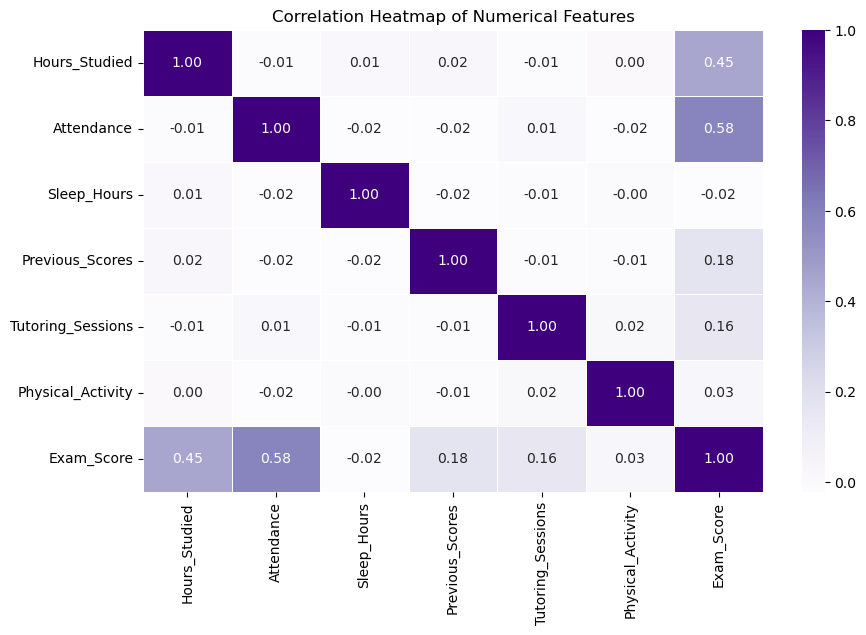

In [19]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

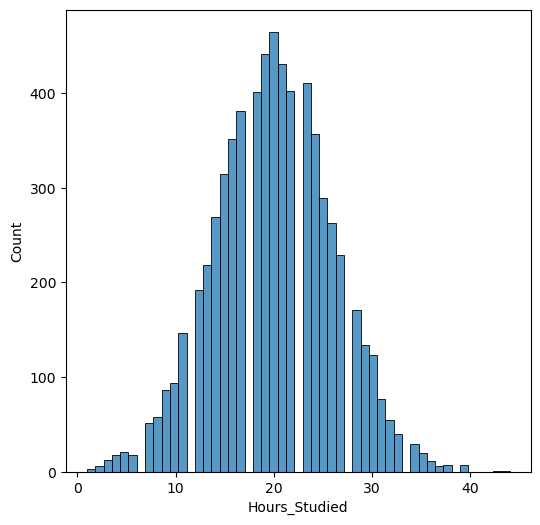

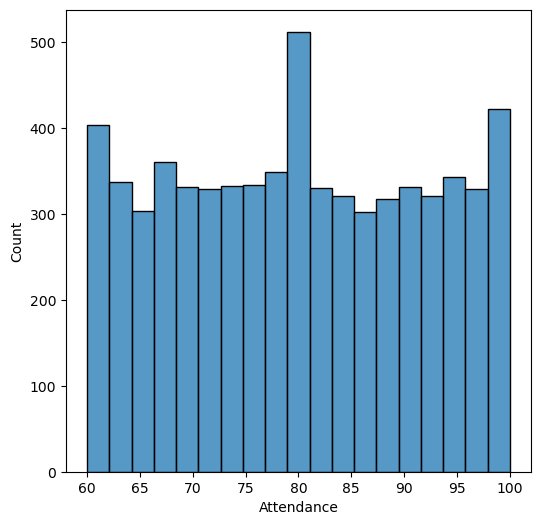

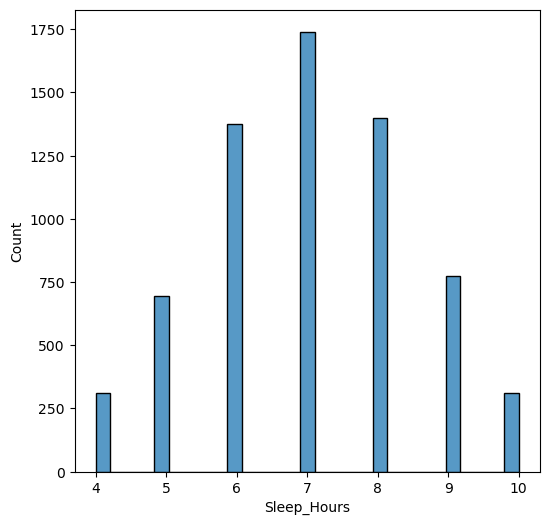

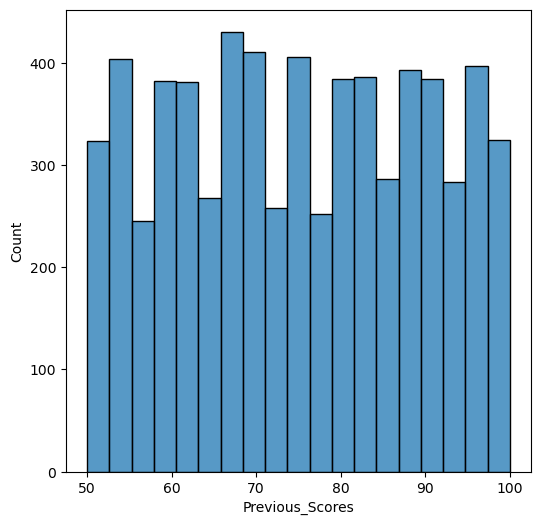

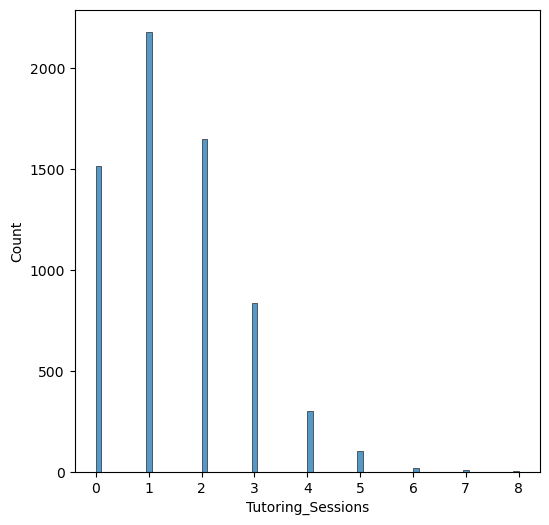

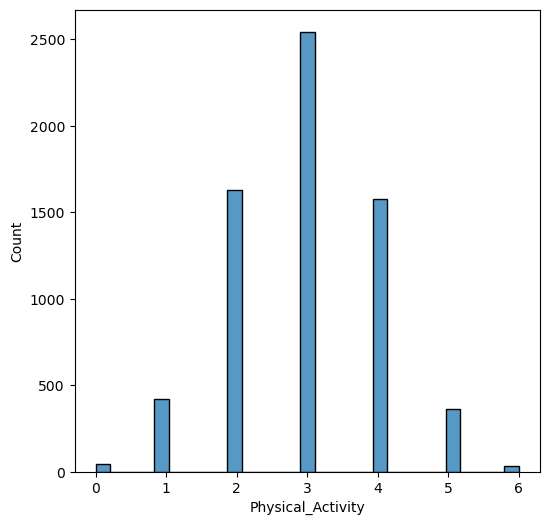

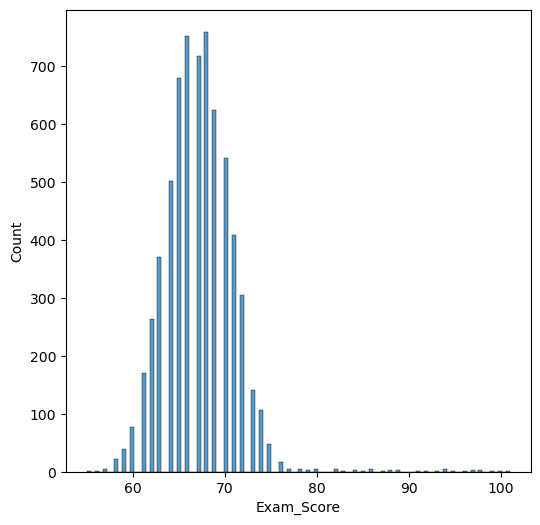

In [29]:
for col in numerical_features:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[col])

In [9]:
categorical_features = df.select_dtypes(include=['O']).columns
categorical_features

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

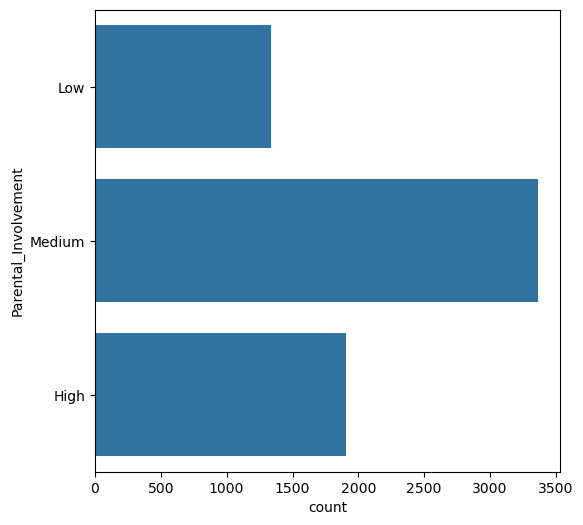

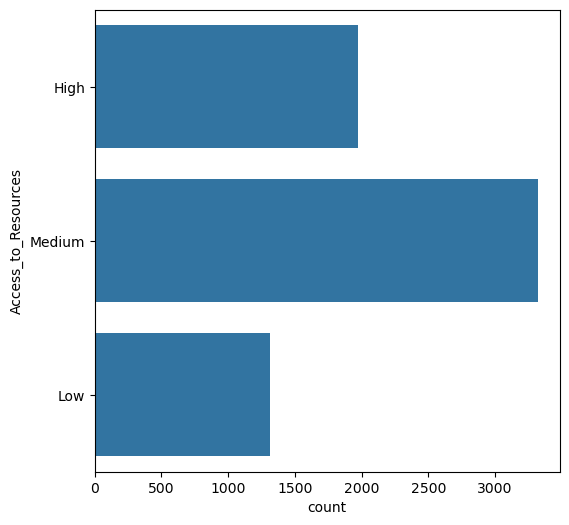

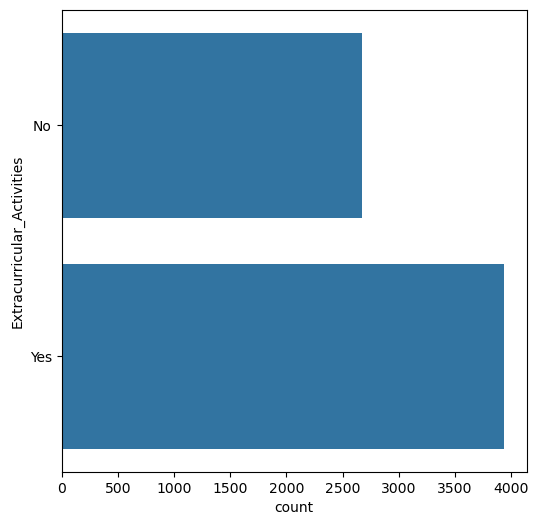

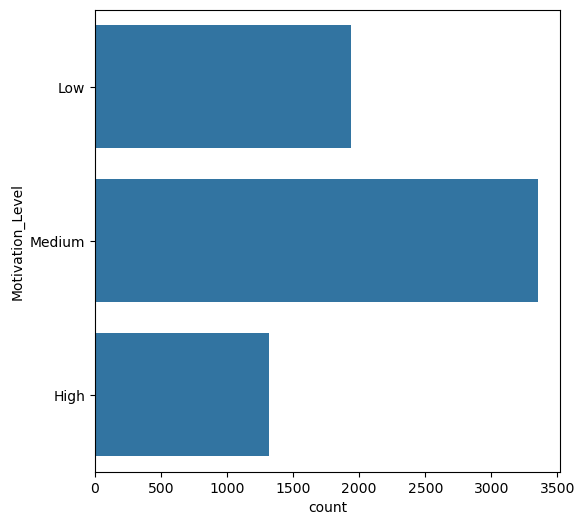

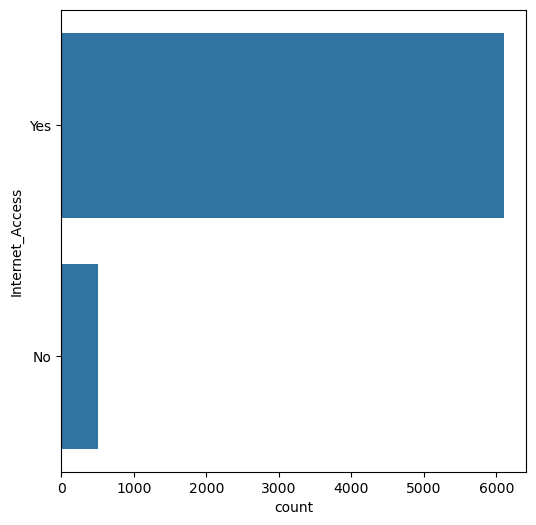

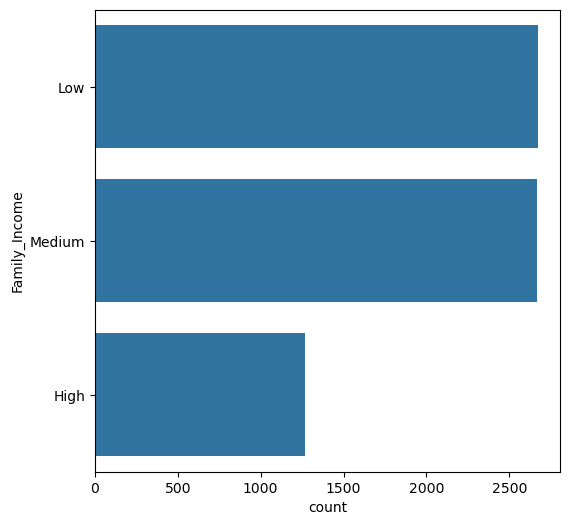

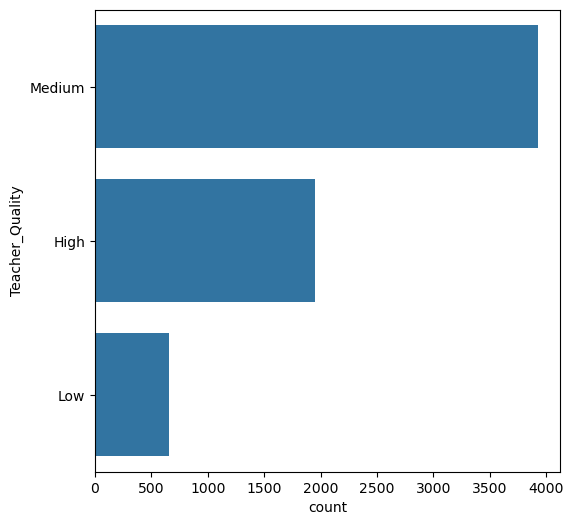

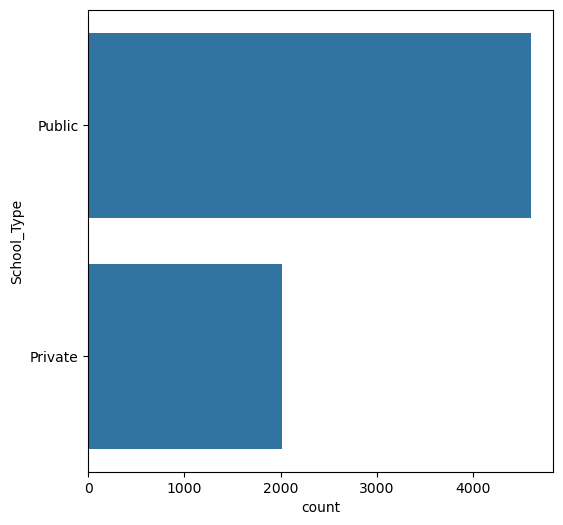

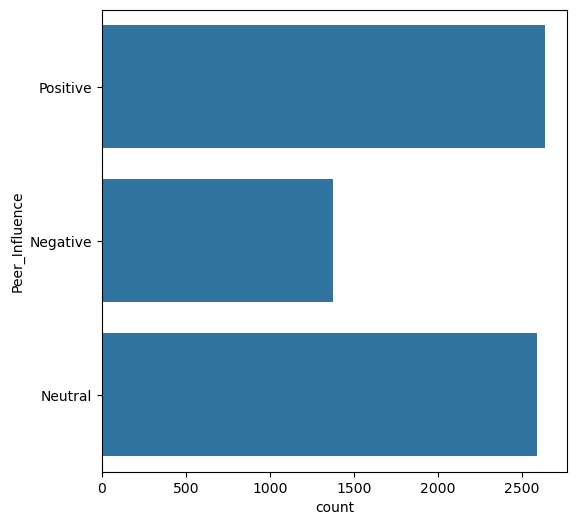

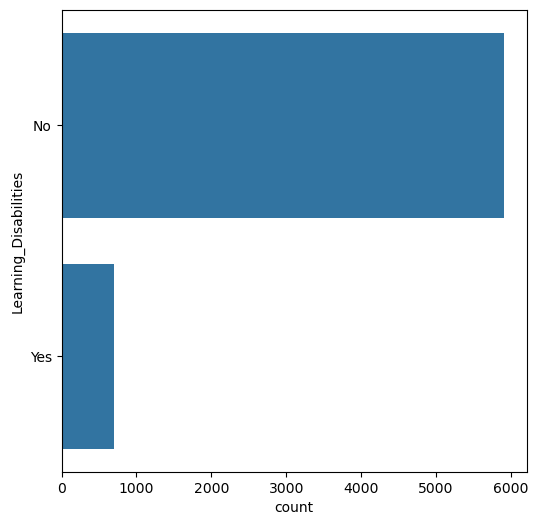

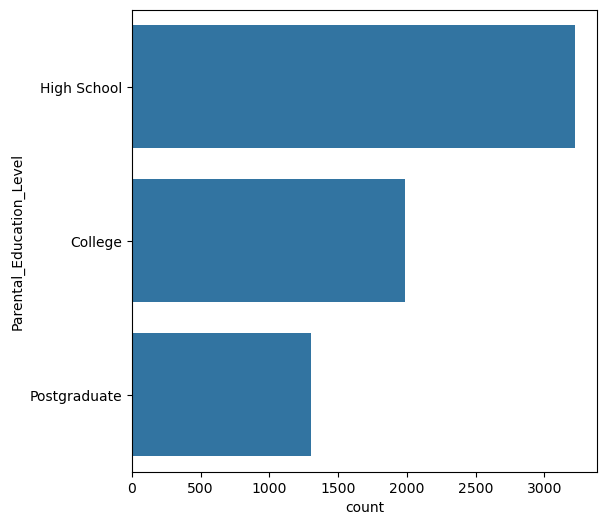

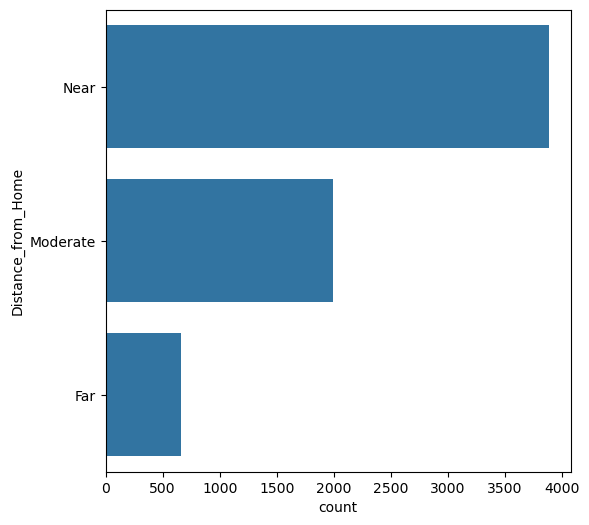

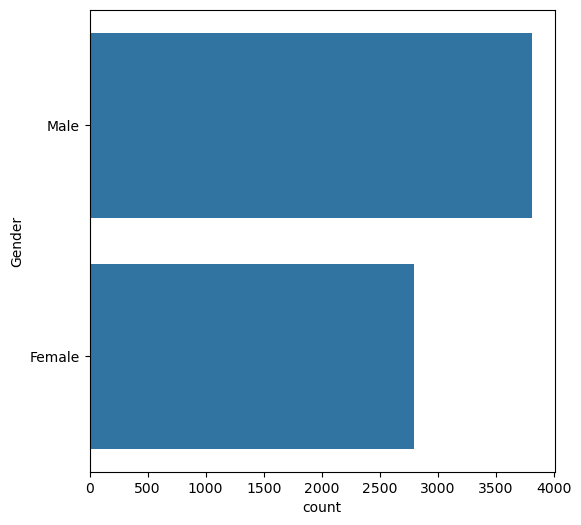

In [57]:
for col in categorical_features:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=df[col]);
    plt.show()

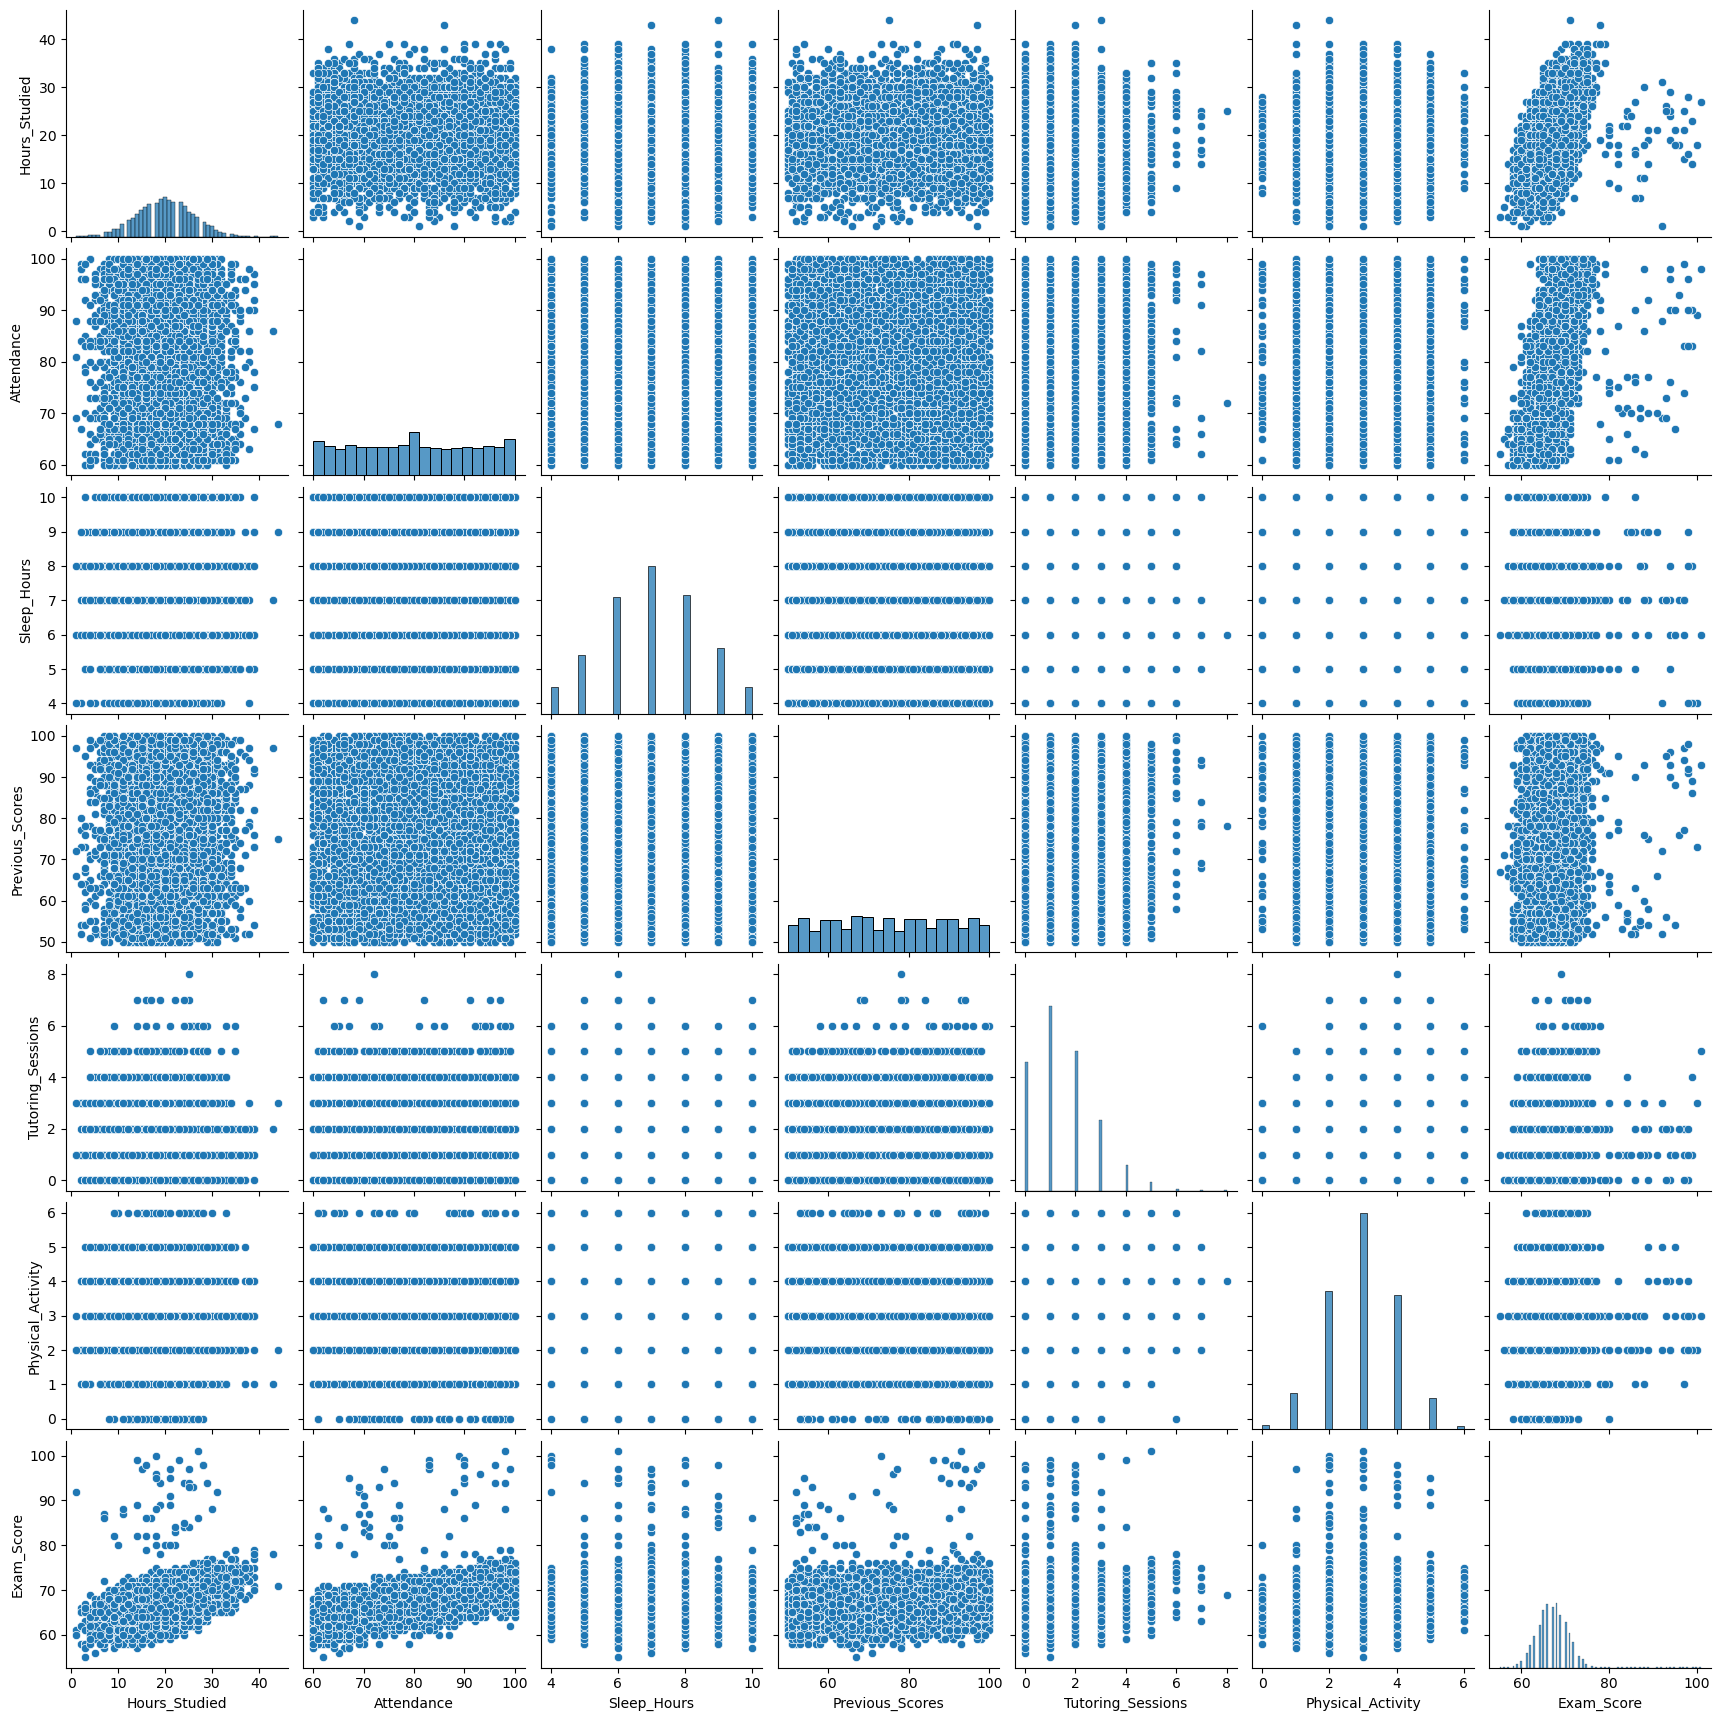

In [60]:
sns.pairplot(df[numerical_features]);

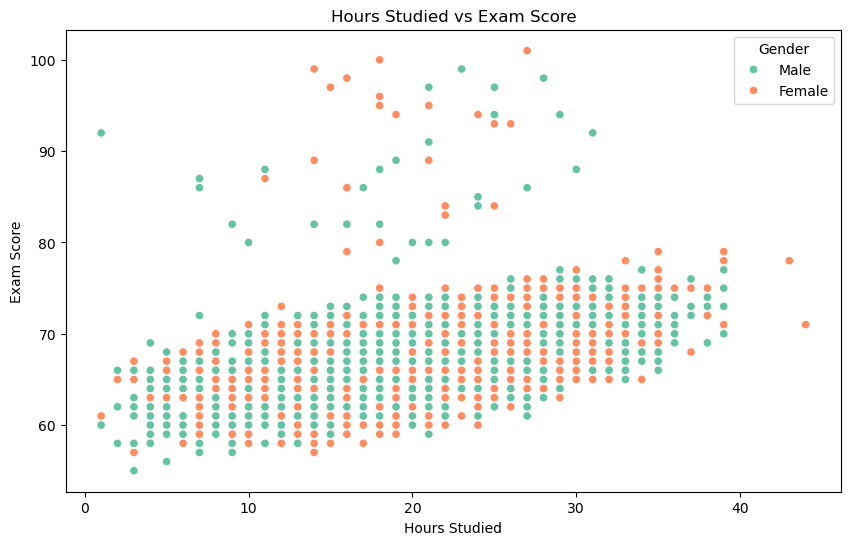

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Gender', palette='Set2')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

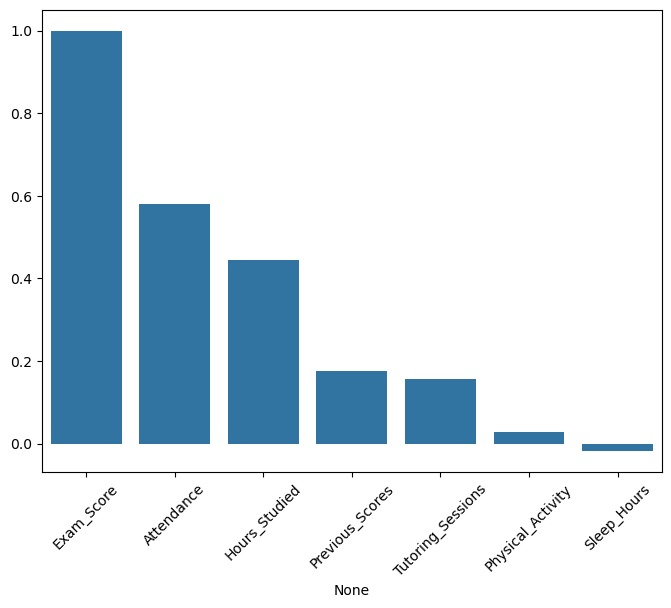

In [76]:
corr_target = df[numerical_features].corr()['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=corr_target.index, y=corr_target.values)
plt.xticks(rotation=45)
plt.show()

### Missing values

In [79]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [11]:
categorical_missing = ["Teacher_Quality", 'Parental_Education_Level',
                                 'Distance_from_Home']
for col in categorical_missing:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.sample(5)    

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1803,11,96,Medium,High,No,5,66,High,Yes,2,Low,Medium,Public,Neutral,4,No,High School,Moderate,Male,68
123,12,88,Low,Medium,No,6,72,Low,Yes,2,Medium,Medium,Public,Positive,2,No,College,Far,Male,64
2348,24,69,Medium,High,Yes,7,81,Low,Yes,3,Medium,Medium,Private,Neutral,4,No,High School,Near,Female,68
3802,13,98,Medium,High,Yes,6,71,Medium,Yes,1,Low,High,Private,Positive,1,No,College,Near,Female,70
6489,28,61,Low,Medium,Yes,7,80,Low,Yes,2,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Female,67


In [13]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [15]:
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income','Teacher_Quality', 'School_Type', 
    'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level','Distance_from_Home','Gender'
]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.sample(5)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
4360,22,61,8,88,1,4,65,False,False,False,...,False,True,True,False,False,True,False,False,True,False
221,9,96,4,82,0,4,67,False,True,False,...,True,True,False,True,False,False,False,False,True,True
1920,8,99,6,83,2,4,70,True,False,False,...,False,True,False,True,True,False,True,False,True,True
485,11,65,7,78,2,3,63,False,True,False,...,True,True,True,False,False,False,True,False,True,False
2956,26,98,4,81,1,4,73,False,True,False,...,True,True,False,True,False,False,True,False,True,True


### Removing outliers

In [114]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

### Building Model

In [18]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
lf = LinearRegression()
lf.fit(X_train, y_train)

LinearRegression()

In [135]:
lf_pred = lf.predict(X_test)
lf_r2 = r2_score(y_test, lf_pred)
lf_mse = mean_squared_error(y_test, lf_pred)

print("R2 score", lf_r2)
print("Mean Squared Error", lf_mse)


R2 score 0.9894221634929541
Mean Squared Error 0.1148563063893639


In [144]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [146]:
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, lf_pred)
rf_mse = mean_squared_error(y_test, lf_pred)

print("R2 score", rf_r2)
print("Mean Squared Error", rf_mse)

R2 score 0.9894221634929541
Mean Squared Error 0.1148563063893639


### Save model

In [159]:
import pickle

pickle.dump(lf, open("student_performance_reg.pkl", "wb"))

**Features example**

In [28]:
X.iloc[0]

Hours_Studied                               23
Attendance                                  84
Sleep_Hours                                  7
Previous_Scores                             73
Tutoring_Sessions                            0
Physical_Activity                            3
Parental_Involvement_Low                  True
Parental_Involvement_Medium              False
Access_to_Resources_Low                  False
Access_to_Resources_Medium               False
Extracurricular_Activities_Yes           False
Motivation_Level_Low                      True
Motivation_Level_Medium                  False
Internet_Access_Yes                       True
Family_Income_Low                         True
Family_Income_Medium                     False
Teacher_Quality_Low                      False
Teacher_Quality_Medium                    True
School_Type_Public                        True
Peer_Influence_Neutral                   False
Peer_Influence_Positive                   True
Learning_Disa

In [48]:
y.iloc[0]

67

In [46]:
lf.predict([[23, 84, 7, 73, 0, 3, True, False, False, False, False, True, False, True, True, False, False,
           True, True, False, True, False, True, False, False, True, True
            ]])

array([67.12037427])